In [20]:
import pandas as pd
import json
import seaborn as sns
import numpy as np

In [2]:
with open('wikidatastats.json','r') as f:
    stats = json.load(f)

In [43]:
def get_total(d):
    if type(d) == list:
        return 0
    elif type(d) == dict:
        return np.sum(list(d.values()))

In [151]:
dates = list(stats.keys())
total_statements = [get_total(stats[date]['references_per_statement_type']) for date in dates]
total_references_wp = [get_total(stats[date]['wp_reference_statements']) for date in dates]
total_references_non_wp = [get_total(stats[date]['non_wp_reference_statements']) for date in dates]
dates = ['-'.join([x[0:4],x[4:6],x[6:]]) for x in dates]

In [152]:
df = pd.DataFrame({
    'date': dates,
    'total_statements':total_statements,
    'total_references_wp':total_references_wp,
    'total_references_non_wp':total_references_non_wp
})

In [156]:
df['total_references_wp_per'] = df.apply(
    lambda x: (x['total_references_wp']/x['total_statements']) if x['total_statements']>0 else 0,
    axis=1
)

df['total_references_non_wp_per'] = df.apply(
    lambda x: (x['total_references_non_wp']/x['total_statements']) if x['total_statements']>0 else 0,
    axis=1
)

df_to_plot = df[['date','total_references_wp_per','total_references_non_wp_per']]
df_to_plot.columns = ['date','Percentage of statements referenced to Wikipedia', 'Percentage of statements referenced to other sources']
df_to_plot_2 = df[['date','total_statements']]
df_to_plot_2.columns = ['date','Total of statements']


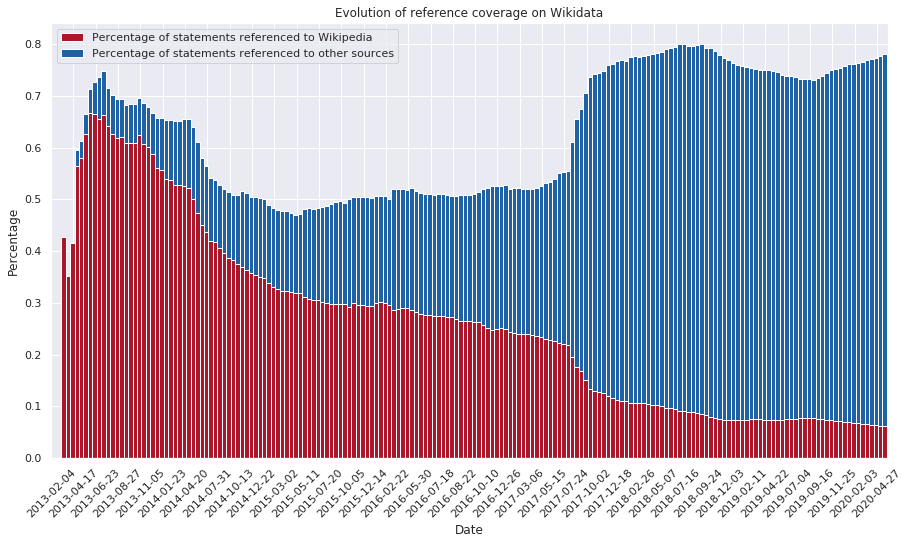

In [159]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

ax = df_to_plot.set_index('date')\
  .plot(
    kind='bar',
    stacked=True,
    colormap=ListedColormap(sns.color_palette("RdBu", 10)), 
    figsize=(15,8), width=1, 
    )
start, end = ax.get_xlim()
plt.xticks(rotation=45)
plt.xticks(np.arange(start, end, 5), dates[::5])
ax.set(title='Evolution of reference coverage on Wikidata',xlabel='Date',ylabel='Percentage')
p = ax.plot()

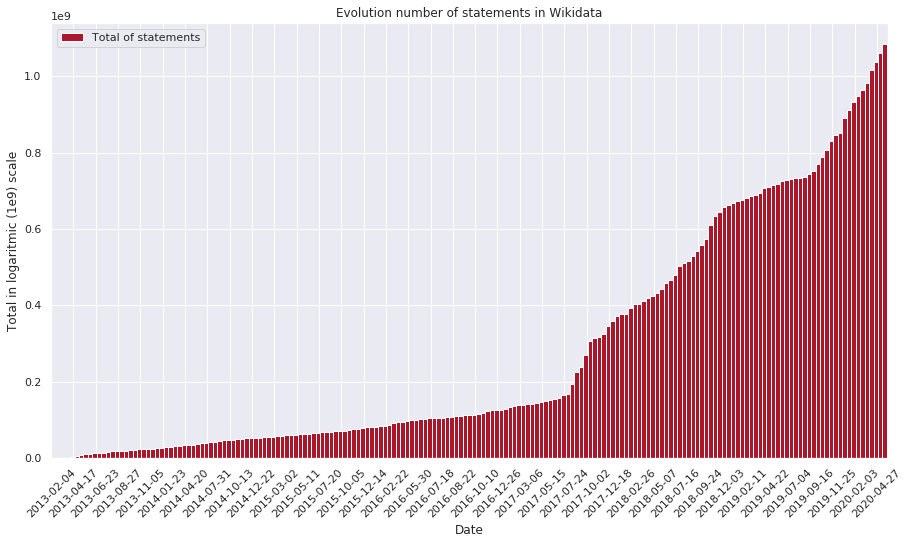

In [160]:
ax = df_to_plot_2.set_index('date')\
  .plot(
    kind='bar',
    stacked=True,
    colormap=ListedColormap(sns.color_palette("RdBu", 10)), 
    figsize=(15,8), width=1, 
    )
start, end = ax.get_xlim()
plt.xticks(rotation=45)
plt.xticks(np.arange(start, end, 5), dates[::5])
ax.set(title='Evolution number of statements in Wikidata',xlabel='Date',ylabel='Total in logaritmic (1e9) scale')
p = ax.plot()